In [ ]:
!pip install vk_requests

In [ ]:
import vk_requests
import time
import pandas as pd
import numpy as np
import seaborn as sns

from pprint import pprint

In [ ]:
token = ''
hse_mem = 'hsemem'
kotow = 'memy_pro_kotow'

api = vk_requests.create_api(service_token=token)

# Получить списки участников

In [ ]:
 # bdate, sex, country, city, education, universities
def load_data(pages, group_id):
    # первая тысяча
    items = api.groups.getMembers(lang=0, group_id=group_id, fields=['bdate', 'sex', 'country', 'city' ,'education', 'universities'])
    next_page = items["next_from"]

    items = items['items']

    for i in range(pages-1):
        next_members = api.groups.getMembers(start_from=next_page, lang=0, group_id=group_id, fields=['bdate', 'sex', 'country', 'city' ,'education', 'universities'])
        items+= next_members['items']
        next_page = next_members["next_from"]
        print(i, "Done!")
        time.sleep(0.5)

    return items

In [ ]:
kotow_members = load_data(255, kotow)

In [ ]:
table = pd.json_normalize(kotow_members)
table.to_csv("kotow.csv", encoding='utf-8')

In [ ]:
hse_members = load_data(91, hse_mem)

0 Done!
1 Done!
2 Done!
3 Done!
4 Done!
5 Done!
6 Done!
7 Done!
8 Done!
9 Done!
10 Done!
11 Done!
12 Done!
13 Done!
14 Done!
15 Done!
16 Done!
17 Done!
18 Done!
19 Done!
20 Done!
21 Done!
22 Done!
23 Done!
24 Done!
25 Done!
26 Done!
27 Done!
28 Done!
29 Done!
30 Done!
31 Done!
32 Done!
33 Done!
34 Done!
35 Done!
36 Done!
37 Done!
38 Done!
39 Done!
40 Done!
41 Done!
42 Done!
43 Done!
44 Done!
45 Done!
46 Done!
47 Done!
48 Done!
49 Done!
50 Done!
51 Done!
52 Done!
53 Done!
54 Done!
55 Done!
56 Done!
57 Done!
58 Done!
59 Done!
60 Done!
61 Done!
62 Done!
63 Done!
64 Done!
65 Done!
66 Done!
67 Done!
68 Done!
69 Done!
70 Done!
71 Done!
72 Done!
73 Done!
74 Done!
75 Done!
76 Done!
77 Done!
78 Done!
79 Done!
80 Done!
81 Done!
82 Done!
83 Done!
84 Done!
85 Done!
86 Done!
87 Done!
88 Done!
89 Done!


In [ ]:
table = pd.json_normalize(hse_members)
table.to_csv("hsemem.csv", encoding='utf-8')

# Почистим данные

## Загрузка

In [ ]:
kotow = pd.read_csv('kotow.csv')
hse = pd.read_csv('hsemem.csv')
kotow.head()

,Unnamed: 0,id,bdate,sex,first_name,last_name,can_access_closed,is_closed,city.id,city.title,...,country.title,university,university_name,faculty,faculty_name,graduation,education_form,education_status,universities,deactivated
0,0,355,1.9,1,Елена,Бацманова,False,True,2.0,Санкт-Петербург,...,Россия,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,591,28.10.1986,2,Иван,Журавлев,True,False,2.0,Санкт-Петербург,...,Россия,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,976,NaN,1,Тамара,Громова,True,False,2.0,Санкт-Петербург,...,Россия,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1038,10.12,2,Ilia,Kukharev,False,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1264,29.4.1988,2,Владимир,Обухов,True,False,2.0,Санкт-Петербург,...,Россия,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
hse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90220 entries, 0 to 90219
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         90220 non-null  int64  
 1   id                 90220 non-null  int64  
 2   bdate              77273 non-null  object 
 3   sex                90220 non-null  int64  
 4   first_name         90220 non-null  object 
 5   last_name          87826 non-null  object 
 6   can_access_closed  90220 non-null  bool   
 7   is_closed          90220 non-null  bool   
 8   city.id            61571 non-null  float64
 9   city.title         61558 non-null  object 
 10  country.id         68554 non-null  float64
 11  country.title      68554 non-null  object 
 12  university         28676 non-null  float64
 13  university_name    20255 non-null  object 
 14  faculty            28676 non-null  float64
 15  faculty_name       13679 non-null  object 
 16  graduation         286

In [ ]:
kotow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254908 entries, 0 to 254907
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         254908 non-null  int64  
 1   id                 254908 non-null  int64  
 2   bdate              204190 non-null  object 
 3   sex                254908 non-null  int64  
 4   first_name         254908 non-null  object 
 5   last_name          246448 non-null  object 
 6   can_access_closed  254908 non-null  bool   
 7   is_closed          254908 non-null  bool   
 8   city.id            133310 non-null  float64
 9   city.title         133189 non-null  object 
 10  country.id         159001 non-null  float64
 11  country.title      158992 non-null  object 
 12  university         87822 non-null   float64
 13  university_name    24655 non-null   object 
 14  faculty            87822 non-null   float64
 15  faculty_name       16746 non-null   object 
 16  gr

## Удаление университетов

In [ ]:
len(hse['universities'].unique())

11337

In [ ]:
len(hse['university_name'].unique())

866

Видим, что разные размеры.
Это связвно с тем, что существует бесчисленное количество комбинаций: n вузов, m магистратур, x аспирантур.

Нам не нужны все высшие образования человека, а только сам факт ВО.
Поэтому нужно проверить, есть ли записи, где в `university_name` пусто, `universities` нет, и при этом это не пустой массив

In [ ]:
hse[hse['university_name'].isna() & hse['universities'].notna() & hse['universities'] == '[]']

,Unnamed: 0,id,bdate,sex,first_name,last_name,can_access_closed,is_closed,city.id,city.title,...,country.title,university,university_name,faculty,faculty_name,graduation,universities,education_form,education_status,deactivated


Произведем удаление незначащих столбцов

`country.id`, `city.id`, `university`, `faculty` - идентификаторы

`universities` можно пренебречь, как выяснили выше

In [ ]:
hse.columns

Index(['Unnamed: 0', 'id', 'bdate', 'sex', 'first_name', 'last_name',
       'can_access_closed', 'is_closed', 'city.id', 'city.title', 'country.id',
       'country.title', 'university', 'university_name', 'faculty',
       'faculty_name', 'graduation', 'universities', 'education_form',
       'education_status', 'deactivated'],
      dtype='object')

In [ ]:
colomns_to_drop = ['Unnamed: 0', 'can_access_closed', 'country.id', 'city.id', 'university', 'universities',  'faculty']

In [ ]:
hse.drop(columns=colomns_to_drop, inplace=True)
kotow.drop(columns=colomns_to_drop, inplace=True)
kotow.head()

,id,bdate,sex,first_name,last_name,is_closed,city.title,country.title,university_name,faculty_name,graduation,education_form,education_status,deactivated
0,355,1.9,1,Елена,Бацманова,True,Санкт-Петербург,Россия,NaN,NaN,NaN,NaN,NaN,NaN
1,591,28.10.1986,2,Иван,Журавлев,False,Санкт-Петербург,Россия,NaN,NaN,NaN,NaN,NaN,NaN
2,976,NaN,1,Тамара,Громова,False,Санкт-Петербург,Россия,NaN,NaN,NaN,NaN,NaN,NaN
3,1038,10.12,2,Ilia,Kukharev,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1264,29.4.1988,2,Владимир,Обухов,False,Санкт-Петербург,Россия,NaN,NaN,NaN,NaN,NaN,NaN


## Удаление Ḍ̵̓͗E̸̛̟̝̅͝L̴͈̘̄̑͑Ḛ̶̙̼̤́T̶̳̟̎͊E̸͈͐̇̍͝D̷̗̳̀̀̆

В данных есть удаленные страницы.


In [ ]:
kotow[kotow['first_name'] == 'DELETED']

,id,bdate,sex,first_name,last_name,is_closed,city.title,country.title,university_name,faculty_name,graduation,education_form,education_status,deactivated
21,9986,12.10,2,DELETED,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,deleted
58,33321,26.8.1986,2,DELETED,NaN,True,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,deleted
153,130523,6.12.1989,2,DELETED,NaN,True,Ставрополь,NaN,NaN,NaN,NaN,NaN,NaN,deleted
301,336993,NaN,1,DELETED,NaN,True,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,deleted
469,626313,17.12,1,DELETED,NaN,True,Москва,NaN,NaN,NaN,NaN,NaN,NaN,deleted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252563,788966991,15.1.2003,1,DELETED,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,deleted
252613,789564398,22.2.2006,1,DELETED,NaN,False,Алматы,NaN,NaN,NaN,NaN,NaN,NaN,deleted
252717,790625386,11.2.2002,2,DELETED,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,deleted
252725,790672978,9.8.2006,1,DELETED,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,deleted


In [ ]:
hse[hse['sex'] == 0]

,id,bdate,sex,first_name,last_name,is_closed,city.title,country.title,university_name,faculty_name,graduation,education_form,education_status,deactivated
83969,547934864,13.8.1993,0,Majic,Mouaki,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84814,559613475,31.12.1994,0,Maria,Borup,False,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
85369,566505910,7.4.2000,0,Цзинь,Цзыхань,False,NaN,NaN,МГУ,Исторический факультет,0.0,NaN,NaN,NaN
85622,571894542,NaN,0,Héloïse,Théolas,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86767,598763940,NaN,0,Luis,Merino Castillo,False,NaN,NaN,Universidad de Piura (UDEP),Derecho,0.0,NaN,NaN,NaN
86842,600599213,NaN,0,Евгений,Гущин,False,Москва,Россия,МГУ,Механико-математический факультет,0.0,NaN,NaN,NaN


Удалим DELETED строки:

In [ ]:
hse = hse[hse['first_name'] != 'DELETED']
kotow = kotow[kotow['first_name'] != 'DELETED']

## Работа с датой

In [ ]:
hse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87826 entries, 0 to 90219
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                87826 non-null  int64  
 1   bdate             75548 non-null  object 
 2   sex               87826 non-null  int64  
 3   first_name        87826 non-null  object 
 4   last_name         87826 non-null  object 
 5   is_closed         87826 non-null  bool   
 6   city.title        60103 non-null  object 
 7   country.title     68554 non-null  object 
 8   university_name   20255 non-null  object 
 9   faculty_name      13679 non-null  object 
 10  graduation        28676 non-null  float64
 11  education_form    6299 non-null   object 
 12  education_status  7145 non-null   object 
 13  deactivated       1680 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(10)
memory usage: 9.5+ MB


In [ ]:
hse['bdate']

0        19.10.1989
1               NaN
2              27.4
3               NaN
4          5.2.1984
            ...    
90215     11.4.1999
90216     25.5.2003
90217     21.6.2004
90218     27.2.2005
90219    16.10.2004
Name: bdate, Length: 87826, dtype: object

Поставим всем, у кого нет года рождения, год 1904 (високосный) и заменю на тип "дата"

In [ ]:
from re import match

def add_year(date_str):
    if type(date_str) == float:
        return None
    if date_str != "NaN":
        # print(date_str)
        # print(type(date_str))

        if not match("\d+\.\d+\.\d\d\d\d", date_str):
            date_str+= ".1904"
        return date_str
    else:
        return None

In [ ]:
hse['bdate'] = pd.to_datetime(hse['bdate'].apply(add_year))
kotow['bdate'] = pd.to_datetime(kotow['bdate'].apply(add_year))
kotow.head()

<ipython-input-19-f96497e4a99b>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  hse['bdate'] = pd.to_datetime(hse['bdate'].apply(add_year))
<ipython-input-19-f96497e4a99b>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  kotow['bdate'] = pd.to_datetime(kotow['bdate'].apply(add_year))


,id,bdate,sex,first_name,last_name,is_closed,city.title,country.title,university_name,faculty_name,graduation,education_form,education_status,deactivated
0,355,1904-01-09,1,Елена,Бацманова,True,Санкт-Петербург,Россия,NaN,NaN,NaN,NaN,NaN,NaN
1,591,1986-10-28,2,Иван,Журавлев,False,Санкт-Петербург,Россия,NaN,NaN,NaN,NaN,NaN,NaN
2,976,NaT,1,Тамара,Громова,False,Санкт-Петербург,Россия,NaN,NaN,NaN,NaN,NaN,NaN
3,1038,1904-10-12,2,Ilia,Kukharev,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1264,1988-04-29,2,Владимир,Обухов,False,Санкт-Петербург,Россия,NaN,NaN,NaN,NaN,NaN,NaN


# Анализ

### По полу

In [ ]:
sex_map = {0: "Не указан", 1: 'Ж', 2: " М"}

kotow['sex'] = kotow['sex'].replace(sex_map)
hse['sex'] = hse['sex'].replace(sex_map)

In [ ]:
def sex_check(df):
    result = df[['id', 'sex']].groupby('sex').count()
    result.columns = ['count']
    result['percent'] = round(result['count'] / result['count'].sum(), 2)
    return result

In [ ]:
sex_check(hse)

,count,percent
sex,,
М,34843,0.4
Ж,52977,0.6
Не указан,6,0.0


In [ ]:
sex_check(kotow)

,count,percent
sex,,
М,135571,0.55
Ж,110776,0.45
Не указан,117,0.00


### По вузу

Уникальных вузов:

In [ ]:
print("Уникальные ВУЗы подписчиков хсе мем:", len(hse['university_name'].unique())-1)
print("Уникальные ВУЗы подписчиков мемы про котов (по ржать):", len(kotow['university_name'].unique())-1)

Уникальные ВУЗы подписчиков хсе мем: 865
Уникальные ВУЗы подписчиков мемы про котов (по ржать): 2386


Процент подписчиков с высшим образованием

In [ ]:
print("Процент пользователей, указавших ВО, в паблике хсе мем", round(hse['university_name'].notna().sum() / hse['id'].count(), 2))
print("Процент пользователей, указавших ВО, в паблике мемы про котов (по ржать)", round(kotow['university_name'].notna().sum() / kotow['id'].count(), 2))

Процент пользователей, указавших ВО, в паблике хсе мем 0.23
Процент пользователей, указавших ВО, в паблике мемы про котов (по ржать) 0.1


In [ ]:
hse[['id', 'university_name']].groupby('university_name')['university_name'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)

,university_name,count
524,НИУ ВШЭ (ГУ-ВШЭ),8767
526,НИУ ВШЭ - Санкт-Петербург,1917
454,МГУ,1532
527,НИУ ВШЭ – НН,796
525,НИУ ВШЭ - Пермь,422
797,Финансовый университет при Правительстве РФ (б...,370
590,РАНХиГС при Президенте РФ (бывш. АНХ при Прави...,359
676,СПбГУ,327
453,МГТУ им. Н. Э. Баумана (бывш. МВТУ),299
626,РЭУ им. Г. В. Плеханова,269


In [ ]:
kotow[['id', 'university_name']].groupby('university_name')['university_name'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)

,university_name,count
1313,МГУ,892
1466,НИУ ВШЭ (ГУ-ВШЭ),663
1805,СПбГУ,564
2052,УрФУ им. первого Президента России Б. Н. Ельцина,375
1312,МГТУ им. Н. Э. Баумана (бывш. МВТУ),337
1822,СПбПУ Петра Великого (Политех),325
1402,МФТИ (Физтех),237
1452,НГУ,210
1682,РТУ МИРЭА,209
836,ДВФУ,204


### По дню рождения

Для адекватной оценки роста нужно убрать записи с пустыми значениями и с 1904 годом

In [ ]:
bdate_hse = hse[(hse['bdate'].dt.year != 1904) & (hse['bdate'].notnull())]
bdate_kotow = kotow[(kotow['bdate'].dt.year != 1904) & (kotow['bdate'].notnull())]
bdate_hse

,id,bdate,sex,first_name,last_name,is_closed,city.title,country.title,university_name,faculty_name,graduation,education_form,education_status,deactivated
0,1257,1989-10-19,М,Олег,Уржумцев,False,İstanbul,Турция,NaN,NaN,NaN,NaN,NaN,NaN
4,4913,1984-05-02,Ж,Марина,Секачева,True,Санкт-Петербург,Россия,NaN,NaN,NaN,NaN,NaN,NaN
5,6559,1984-01-13,М,Федор,Клименко,False,Барнаул,Россия,АлтГУ,Филологический,2009.0,Очное отделение,Выпускник (специалист),NaN
6,8612,1996-01-04,Ж,Анастасия,Оболенская,False,Phuket,Таиланд,СПбГЭТУ «ЛЭТИ»,"Компьютерных технологий и информатики (ФКТИ, Ф...",2004.0,Очное отделение,Выпускница (магистр),NaN
8,9804,1988-08-25,М,Никита,Бешта,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90215,830396727,1999-11-04,Ж,Оля,Лукашева,False,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
90216,831103928,2003-05-25,Ж,Victoria,Dws,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90217,831468772,2004-06-21,М,Артём,Имаев,True,Самара,Россия,NaN,NaN,NaN,NaN,NaN,NaN
90218,832344166,2005-02-27,М,Артём,Шурыгин,False,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [ ]:
from datetime import datetime

def calculate_age(birthdate):
    if birthdate != None:
        today = datetime.now()
        age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
        return age

bdate_hse['age'] = bdate_hse['bdate'].apply(calculate_age)
bdate_kotow['age'] = bdate_kotow['bdate'].apply(calculate_age)

<ipython-input-29-4da30f64abd3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bdate_hse['age'] = bdate_hse['bdate'].apply(calculate_age)
<ipython-input-29-4da30f64abd3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bdate_kotow['age'] = bdate_kotow['bdate'].apply(calculate_age)


<Axes: xlabel='age'>

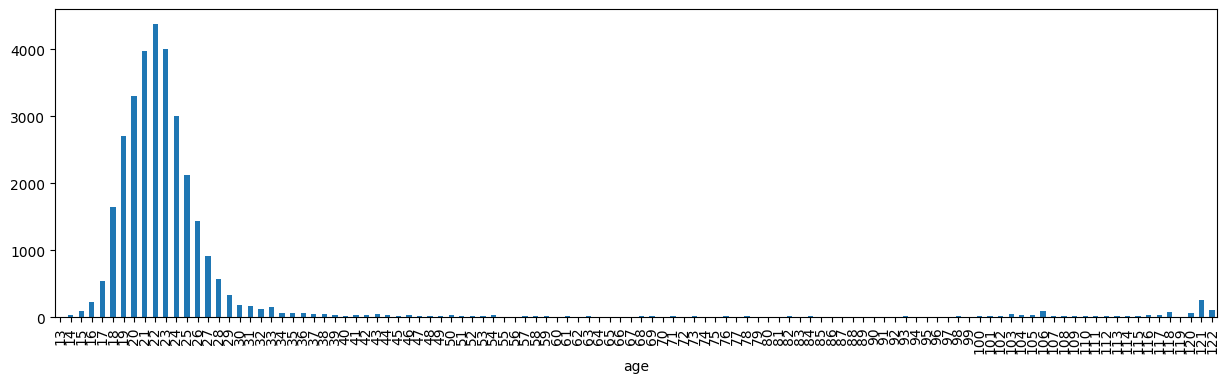

In [ ]:
bdate_hse.groupby(['age'])['age'].count().plot(kind='bar', figsize=(15, 4))

<Axes: xlabel='age'>

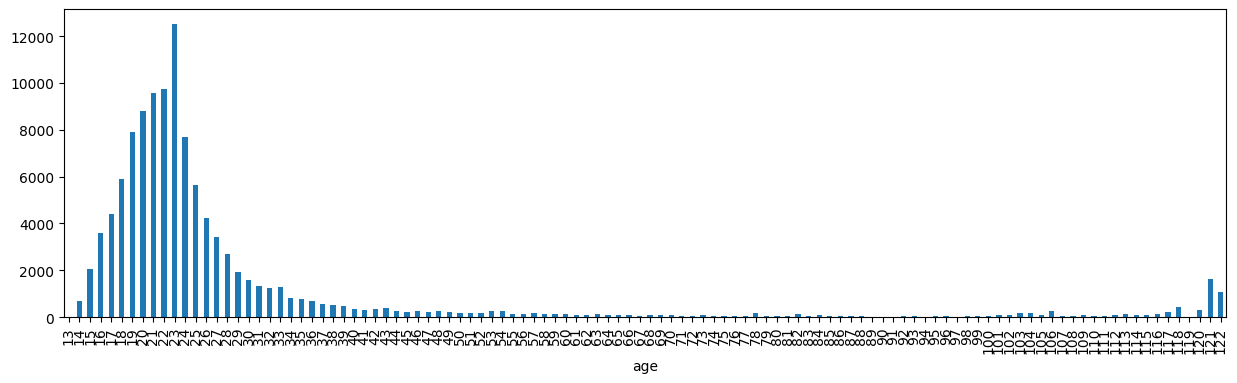

In [ ]:
bdate_kotow.groupby(['age'])['age'].count().plot(kind='bar', figsize=(15, 4))

### По знакам зодиака

In [ ]:
zodiacs = [(120, 'Козерог'), (218, 'Водолей'), (320, 'Рыбы'), (420, 'Овен'), (521, 'Телец'),
           (621, 'Близнецы'), (722, 'Рак'), (823, 'Лев'), (923, 'Дева'), (1023, 'Весы'),
           (1122, 'Скорпион'), (1222, 'Стрелец'), (1231, 'Козерог')]


# Овен	Aries	[ ˈeəriːz ]	The Ram	21 March – 20 April
# Телец	Taurus	[ ˈtɔːrəs ]	The Bull	21 April – 21 May
# Близнецы	Gemini	[ ˈdʒemɪni ] [ ˈdʒemɪnaɪ ]	The Twins	22 May – 21 June
# Рак	Cancer	[ ˈkænsə ]	The Crab	22 June – 22 July
# Лев	Leo	[ ˈliːəʊ ]	The Lion	23 July – 21 August
# Дева	Virgo	[ ˈvɜːɡəʊ ]	The Maiden	22 August – 23 September
# Весы	Libra	[ ˈliːbrə ]	The Scales	24 September – 23 October
# Скорпион	Scorpio	[ ˈskɔːpɪəʊ ]	The Scorpion	24 October – 22 November
# Стрелец	Sagittarius	[ ˌsædʒɪˈteərɪəs ]	The (Centaur) Archer	23 November – 22 December
# Козерог	Capricorn	[ ˈkæprɪkɔːn ]	"Goat-Horned" (The Sea-Goat)	23 December – 20 January
# Водолей	Aquarius	[ əˈkweəriəs ]	The Water-Bearer	21 January – 19 February
# Рыбы	Pisces	[ ˈpaɪsiːz ]	The Fishes	20 February – 20 March

def get_zodiac_of_date(date):
    date_number = int("".join((str(date.date().month), '%02d' % date.date().day)))
    for z in zodiacs:
        if date_number <= z[0]:
            return z[1]

In [ ]:
bdate_hse['zodiac'] = bdate_hse['bdate'].apply(get_zodiac_of_date)
bdate_kotow['zodiac'] = bdate_kotow['bdate'].apply(get_zodiac_of_date)

bdate_hse

<ipython-input-33-e27d77cf5b06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bdate_hse['zodiac'] = bdate_hse['bdate'].apply(get_zodiac_of_date)
<ipython-input-33-e27d77cf5b06>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bdate_kotow['zodiac'] = bdate_kotow['bdate'].apply(get_zodiac_of_date)


,id,bdate,sex,first_name,last_name,is_closed,city.title,country.title,university_name,faculty_name,graduation,education_form,education_status,deactivated,age,zodiac
0,1257,1989-10-19,М,Олег,Уржумцев,False,İstanbul,Турция,NaN,NaN,NaN,NaN,NaN,NaN,34,Весы
4,4913,1984-05-02,Ж,Марина,Секачева,True,Санкт-Петербург,Россия,NaN,NaN,NaN,NaN,NaN,NaN,39,Телец
5,6559,1984-01-13,М,Федор,Клименко,False,Барнаул,Россия,АлтГУ,Филологический,2009.0,Очное отделение,Выпускник (специалист),NaN,39,Козерог
6,8612,1996-01-04,Ж,Анастасия,Оболенская,False,Phuket,Таиланд,СПбГЭТУ «ЛЭТИ»,"Компьютерных технологий и информатики (ФКТИ, Ф...",2004.0,Очное отделение,Выпускница (магистр),NaN,27,Козерог
8,9804,1988-08-25,М,Никита,Бешта,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,Дева
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90215,830396727,1999-11-04,Ж,Оля,Лукашева,False,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,24,Скорпион
90216,831103928,2003-05-25,Ж,Victoria,Dws,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,Близнецы
90217,831468772,2004-06-21,М,Артём,Имаев,True,Самара,Россия,NaN,NaN,NaN,NaN,NaN,NaN,19,Близнецы
90218,832344166,2005-02-27,М,Артём,Шурыгин,False,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,18,Рыбы


In [ ]:
import matplotlib.pyplot as plt

def plot_zodiac_stats(df, title):
    zodiac_stats = df[['id', 'zodiac']].groupby('zodiac')['zodiac'].count().reset_index(name='count').sort_values(['count'], ascending=False)

    fig, ax = plt.subplots(figsize=(12, 4))

    for index, rows in zodiac_stats.iterrows():
        p = ax.bar(rows['zodiac'], rows['count'], color='royalblue')
        ax.bar_label(p, label_type='edge')

    ax.set_title(title);
    plt.show()

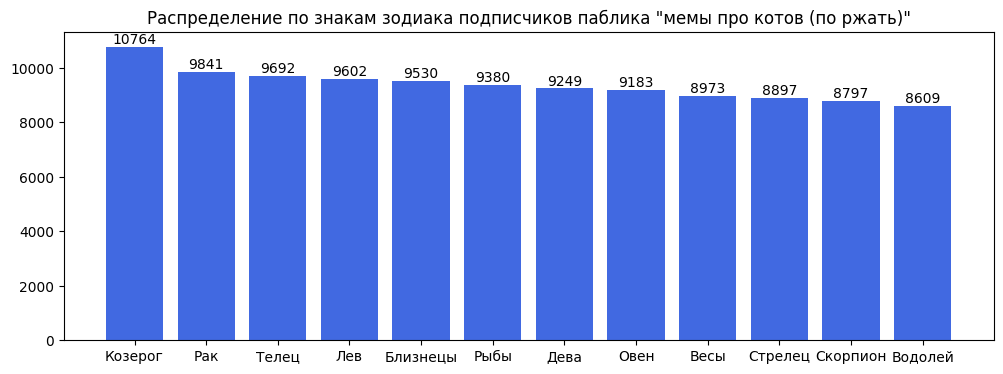

In [ ]:
plot_zodiac_stats(bdate_kotow, 'Распределение по знакам зодиака подписчиков паблика "мемы про котов (по ржать)"')

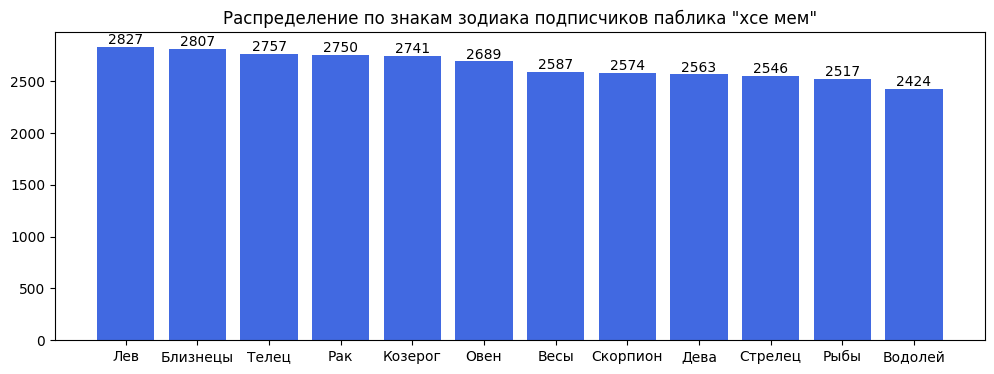

In [ ]:
plot_zodiac_stats(bdate_hse, 'Распределение по знакам зодиака подписчиков паблика "хсе мем"')

### Пересечение пользователей

In [ ]:
hse_set = hse['id'].unique()
kotow_set = kotow['id'].unique()

In [ ]:
len(hse_set), len(kotow_set)

(87826, 246383)

In [ ]:
intersection = np.intersect1d(kotow_set, hse_set)
length = len(intersection)
print("Количество подписчиков обоих пабликов: ", length)
print(f"{round(length / len(hse_set) * 100)}% подписчиков паблика хсе мем подписаны на мемы про котов (по ржать)")
print(f"{round(length / len(kotow_set) * 100)}% подписчиков мемы про котов (по ржать) подписаны на паблик хсе мем")

Количество подписчиков обоих пабликов:  6278
7% подписчиков паблика хсе мем подписаны на мемы про котов (по ржать)
3% подписчиков мемы про котов (по ржать) подписаны на паблик хсе мем


# Network X


In [ ]:
# src https://github.com/nikolaygurev/VK_friends_visualization/blob/master/vk_friends_visualization.ipynb
import networkx as nx

In [ ]:
kotow[(kotow['first_name'] == 'Семён') & (kotow['last_name'] == 'Лукин')]

Получим друзей

In [ ]:
def get_friends(id):
    try:
        friends =  api.friends.get(user_id=id, fields=["first_name", "last_name"])
    except Exception:
        return {}

    friends = {user['id']: user["first_name"]+' '+ user["last_name"] for user in friends['items']}
    time.sleep(0.5)
    return friends

In [ ]:
CENTRAL_USER_ID = ""
central_users = get_friends(CENTRAL_USER_ID)

Получим друзей друзей

In [ ]:
friends_friends = {user_id: get_friends(user_id) for user_id in central_users.keys()}
friends_friends

## Граф


In [ ]:
friends = friends_friends.copy()
friends[CENTRAL_USER_ID] = central_users

In [ ]:
g = nx.Graph()

for user_id, user_friends in friends.items():
    g.add_node(user_id)
    for friend_id in user_friends:
        if friend_id in central_users:
            g.add_edge(user_id, friend_id)

In [ ]:
g = nx.Graph()
g.add_node(CENTRAL_USER_ID)
for user_id, user_name in central_users.items():
    g.add_node(user_id)
    g.add_edge(CENTRAL_USER_ID, user_id)

In [ ]:
def graph_descr(g):
    print('Вершины графа:\n')
    print('Количество -', g.number_of_nodes())
    print('Средний кластерный коэффициент -', \
          np.average(np.array(list(nx.clustering(g).values()))))
    print('Средняя степень -', \
          np.average(np.array([degree for user_name_, degree in nx.degree(g)])))

graph_descr(g)

Вершины графа:

Количество - 141
Средний кластерный коэффициент - 0.6366306662815928
Средняя степень - 14.581560283687944


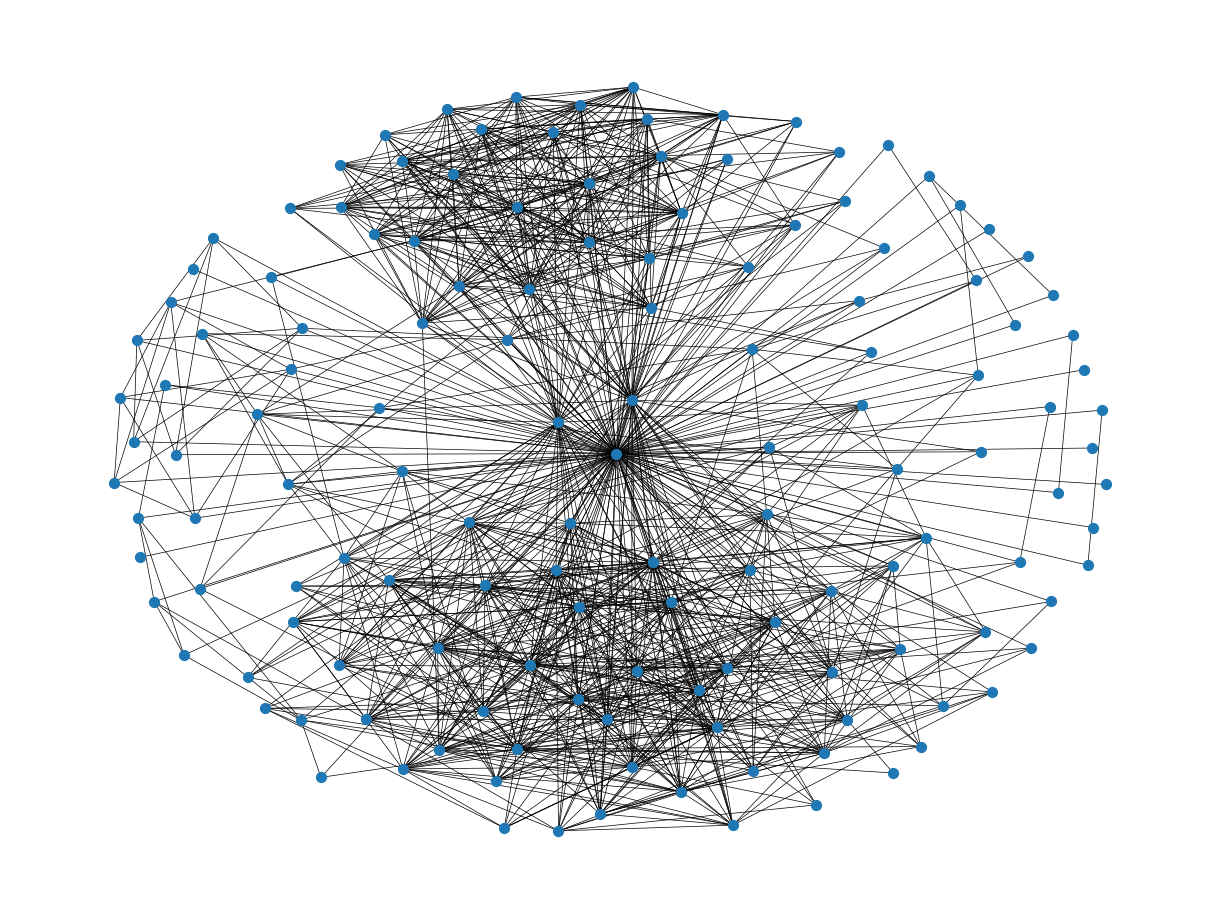

In [ ]:
def graph_plot():
    plt.figure(figsize=(12, 9))
    nx.draw_kamada_kawai(g, with_labels=False, node_size=50, width=0.5)
    plt.show()

graph_plot()